## Scraping
Menggunakan Beautiful Soup

In [ ]:
import requests #Modul request ini memperbolehkan kita untuk meminta HTTP Request melalui Python
import pandas as pd # Python Data Analysis library spt biasa
import seaborn as sns # ini sama kayak matplotlib, untuk visualisasi statistik data
import matplotlib.pyplot as plt # ^
from bs4 import BeautifulSoup as bs4 # Library untuk pengambil(PARSING) data dari HTML dan XML

Text scraping ini mengambil data melalui request http. dalam kasus kali ini kita menggunakan wikipedia, tapi perlu di ingat tidak semua website dapat memberikan data dengan metode ini, hanya website public yang tidak membutuhkan login ataupun keamanan khusus saja.

untuk yang lain, kadang membutuhkan token login maupun API dari website/apl tertentu.

In [ ]:
request_data = requests.get(
    "https://simple.wikipedia.org/wiki/List_of_countries_by_continents").text
benua_req

In [ ]:
benua_req = requests.get(
    "https://simple.wikipedia.org/wiki/List_of_countries_by_continents").text # nah ini untuk mengambil semua feature yang ada di dalam website
    # dengan url spesifik kita akan mendapatkan raw html file dari http request tadi dalam bentuk teks
benua_req

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of countries by continents - Simple English Wikipedia, the free encyclopedia</title>\n<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-ena

In [ ]:
benua_soup = bs4(benua_req,"lxml")  # bs4 itu lib nya, benua itu textnya yang berupa html/xml,
                                    # lxml itu adalah toolkit nya untuk prosessing file text html/xml
benua = benua_soup.find_all('h2' > 'span', {"class":"mw-headline"})
# Line 3 ini, pake fitur find_all dengan mencari tag <h2> dan didalam nya ada span dengan class:mw-headline
benua # setelah semua di temukan, maka akan jadi seperti ini
# notes untuk beberapa website tidak terlalu sama, jadi user harus mempelajari struktur html terlebih dahulu

[<span class="mw-headline" id="Africa">Africa</span>,
 <span class="mw-headline" id="Antarctica">Antarctica</span>,
 <span class="mw-headline" id="Asia">Asia</span>,
 <span class="mw-headline" id="Europe">Europe</span>,
 <span class="mw-headline" id="North_America">North America</span>,
 <span class="mw-headline" id="South_America">South America</span>,
 <span class="mw-headline" id="Oceania">Oceania</span>,
 <span class="mw-headline" id="References">References</span>,
 <span class="mw-headline" id="Other_websites">Other websites</span>]

In [ ]:
unwanted_words = ["Antarctica","References","Other websites"] #buang beberapa ini, karena ga relevan
target_benua = [continent.text for continent in benua if continent.text not in unwanted_words]
target_benua

['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

In [ ]:
ol_html = benua_soup.find_all('ol') # temukan semua ordered list di benua_soup
negara = [countries.find_all('li',{"class": None, "id": None}) for countries in ol_html]
# bikin variable baru, terus find semua tag <li> dengan class dan id none di ol_html
negara

[[<li><a href="/wiki/Algeria" title="Algeria">Algeria</a> - <a href="/wiki/Algiers" title="Algiers">Algiers</a></li>,
  <li><a href="/wiki/Angola" title="Angola">Angola</a> - <a href="/wiki/Luanda" title="Luanda">Luanda</a></li>,
  <li><a href="/wiki/Benin" title="Benin">Benin</a> - <a class="mw-redirect" href="/wiki/Porto_Novo" title="Porto Novo">Porto Novo</a>, <a href="/wiki/Cotonou" title="Cotonou">Cotonou</a></li>,
  <li><a href="/wiki/Botswana" title="Botswana">Botswana</a> - <a href="/wiki/Gaborone" title="Gaborone">Gaborone</a></li>,
  <li><a href="/wiki/Burkina_Faso" title="Burkina Faso">Burkina Faso</a> - <a href="/wiki/Ouagadougou" title="Ouagadougou">Ouagadougou</a></li>,
  <li><a href="/wiki/Burundi" title="Burundi">Burundi</a> - <a href="/wiki/Gitega" title="Gitega">Gitega</a></li>,
  <li><a href="/wiki/Cameroon" title="Cameroon">Cameroon</a> (also spelled Cameroun) - <a href="/wiki/Yaound%C3%A9" title="Yaoundé">Yaoundé</a></li>,
  <li><a href="/wiki/Cape_Verde" title="Ca

In [ ]:
negara_benua = [] # variable negara di setiap benua
for items in negara:
    a_negara = [] # variable negara
    if items:
        for country in items:
            a_negara = [country.find('a').text for country in items if country.find('a')] # ngesplit array negara, untuk masing" benua
        negara_benua.append(a_negara) #append ini buat ngelist single item, ke array yang ada di countries ke negara benua
negara_benua

[['Algeria',
  'Angola',
  'Benin',
  'Botswana',
  'Burkina Faso',
  'Burundi',
  'Cameroon',
  'Cape Verde',
  'Central African Republic',
  'Chad',
  'Comoros',
  'Republic of the Congo',
  'Democratic Republic of the Congo',
  "Côte d'Ivoire",
  'Djibouti',
  'Equatorial Guinea',
  'Egypt',
  'Eritrea',
  'Ethiopia',
  'Gabon',
  'The Gambia',
  'Ghana',
  'Guinea',
  'Guinea-Bissau',
  'Kenya',
  'Lesotho',
  'Liberia',
  'Libya',
  'Madagascar',
  'Malawi',
  'Mali',
  'Mauritania',
  'Mauritius',
  'Morocco',
  'Mozambique',
  'Namibia',
  'Niger',
  'Nigeria',
  'Réunion',
  'Rwanda',
  'São Tomé and Príncipe',
  'Senegal',
  'Seychelles',
  'Sierra Leone',
  'Somalia',
  'South Africa',
  'South Sudan',
  'Sudan',
  'Swaziland',
  'Tanzania',
  'Togo',
  'Tunisia',
  'Uganda',
  'Western Sahara',
  'Zambia',
  'Zimbabwe'],
 ['Afghanistan',
  'Armenia',
  'Azerbaijan',
  'Bahrain',
  'Bangladesh',
  'Bhutan',
  'Brunei',
  'Cambodia',
  'China',
  'East Timor',
  'Georgia',
  '

In [ ]:
countries_continent_category_df = pd.DataFrame(
    zip(negara_benua, target_benua), columns=['Country', 'Continent'])
countries_continent_category_df # mengubah list array menjadi tabel

,Country,Continent
0,"[Algeria, Angola, Benin, Botswana, Burkina Fas...",Africa
1,"[Afghanistan, Armenia, Azerbaijan, Bahrain, Ba...",Asia
2,"[Albania, Andorra, Austria, Belarus, Belgium, ...",Europe
3,"[Canada, Mexico, United States of America, Nav...",North America
4,"[Brazil, Argentina, Bolivia, Chile, Colombia, ...",South America
5,"[Australia, Fiji, New Zealand, Federated State...",Oceania


In [ ]:
countries_continent_category_df = countries_continent_category_df.explode(
    'Country').reset_index(drop=True)
countries_continent_category_df # mengubah index tabel menjadi per-negara daripada benua

,Country,Continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa
...,...,...
201,Samoa,Oceania
202,Solomon Islands,Oceania
203,Tonga,Oceania
204,Tuvalu,Oceania


In [ ]:
countries_continent_category_df = countries_continent_category_df.replace('United States of America', 'United States')
countries_continent_category_df

,Country,Continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa
...,...,...
201,Samoa,Oceania
202,Solomon Islands,Oceania
203,Tonga,Oceania
204,Tuvalu,Oceania


In [ ]:
countries_score_page = requests.get("https://www.worldometers.info/world-population/population-by-country/")
countries_score_soup = bs4(countries_score_page.content,'lxml')
countries_score_soup

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>Population by Country (2023) - Worldometer</title><meta content="List of countries and dependencies in the world ranked by population, from the most populated. Growth rate, median age, fertility rate, area, density, population density, urbanization, urban population, share of world population." name="description"/><!-- Favicon --><link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/><link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link h

In [ ]:
countries_score_table = countries_score_soup.find('table', {'class':'table'})
countries_score_table

<table cellspacing="0" class="table table-striped table-bordered" id="example2" width="100%"> <thead> <tr> <th>#</th> <th>Country (or dependency)</th> <th>Population<br/> (2020)</th> <th>Yearly<br/> Change</th> <th>Net<br/> Change</th> <th>Density<br/> (P/Km²)</th> <th>Land Area<br/> (Km²)</th> <th>Migrants<br/> (net)</th> <th>Fert.<br/> Rate</th> <th>Med.<br/> Age</th> <th>Urban<br/> Pop %</th> <th>World<br/> Share</th> </tr> </thead> <tbody> <tr> <td>1</td> <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/china-population/">China</a></td> <td style="font-weight: bold;">1,439,323,776</td> <td>0.39 %</td> <td>5,540,090</td> <td>153</td> <td>9,388,211</td> <td>-348,399</td> <td>1.7</td> <td>38</td> <td>61 %</td> <td>18.47 %</td> </tr> <tr> <td>2</td> <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/india-population/">India</a></td> <td style="font-weight: bold;">1,380,004,385</td> <td>0.99 %</td> <td>13,58

In [ ]:
countries_score_df = pd.read_html(str(countries_score_table))
countries_score_df

[       # Country (or dependency)  Population  (2020) Yearly  Change  \
 0      1                   China          1439323776         0.39 %   
 1      2                   India          1380004385         0.99 %   
 2      3           United States           331002651         0.59 %   
 3      4               Indonesia           273523615         1.07 %   
 4      5                Pakistan           220892340         2.00 %   
 ..   ...                     ...                 ...            ...   
 230  231              Montserrat                4992         0.06 %   
 231  232        Falkland Islands                3480         3.05 %   
 232  233                    Niue                1626         0.68 %   
 233  234                 Tokelau                1357         1.27 %   
 234  235                Holy See                 801         0.25 %   
 
      Net  Change  Density  (P/Km²)  Land Area  (Km²)  Migrants  (net)  \
 0        5540090               153           9388211       

In [ ]:
countries_score_df = countries_score_df[0]
countries_score_df

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,2,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,3,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,4,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,5,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,4992,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,232,Falkland Islands,3480,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,233,Niue,1626,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,234,Tokelau,1357,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [ ]:
countries_score_df = countries_score_df.rename(columns={"Country (or dependency)":"Country","Population (2020)":"Population"})
countries_score_df

,#,Country,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,2,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,3,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,4,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,5,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,4992,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,232,Falkland Islands,3480,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,233,Niue,1626,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,234,Tokelau,1357,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [ ]:
countries_score_df = countries_score_df.replace('N.A.', '0')
countries_score_df

,#,Country,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,2,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,3,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,4,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,5,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,4992,0.06 %,3,50,100,NaN,0,0,10 %,0.00 %
231,232,Falkland Islands,3480,3.05 %,103,0,12170,NaN,0,0,66 %,0.00 %
232,233,Niue,1626,0.68 %,11,6,260,NaN,0,0,46 %,0.00 %
233,234,Tokelau,1357,1.27 %,17,136,10,NaN,0,0,0 %,0.00 %


In [ ]:
merged_df = pd.merge(countries_score_df, countries_continent_category_df, how='inner', on='Country')
merged_df.to_csv('final_result.csv')
merged_df

,#,Country,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Continent
0,1,China,1439323776,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %,Asia
1,2,India,1380004385,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %,Asia
2,3,United States,331002651,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %,North America
3,4,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %,Asia
4,5,Pakistan,220892340,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,218,San Marino,33931,0.21 %,71,566,60,NaN,0,0,97 %,0.00 %,Europe
186,222,Palau,18094,0.48 %,86,39,460,NaN,0,0,0,0.00 %,Oceania
187,225,Tuvalu,11792,1.25 %,146,393,30,NaN,0,0,62 %,0.00 %,Oceania
188,227,Nauru,10824,0.63 %,68,541,20,NaN,0,0,0,0.00 %,Oceania


## Analysis
Kenapa kita gak ambil langsung aja data ranking nya?
itu bisa sekali, tapi, disini kita akan membuat kenapa kita menambahkan field continent(benua) ke dataframe kita.

field benua akan membantu kita untuk analisis data, dan klasifikasi berdasarkan benua.


Text(0, 0.5, 'Populasi')

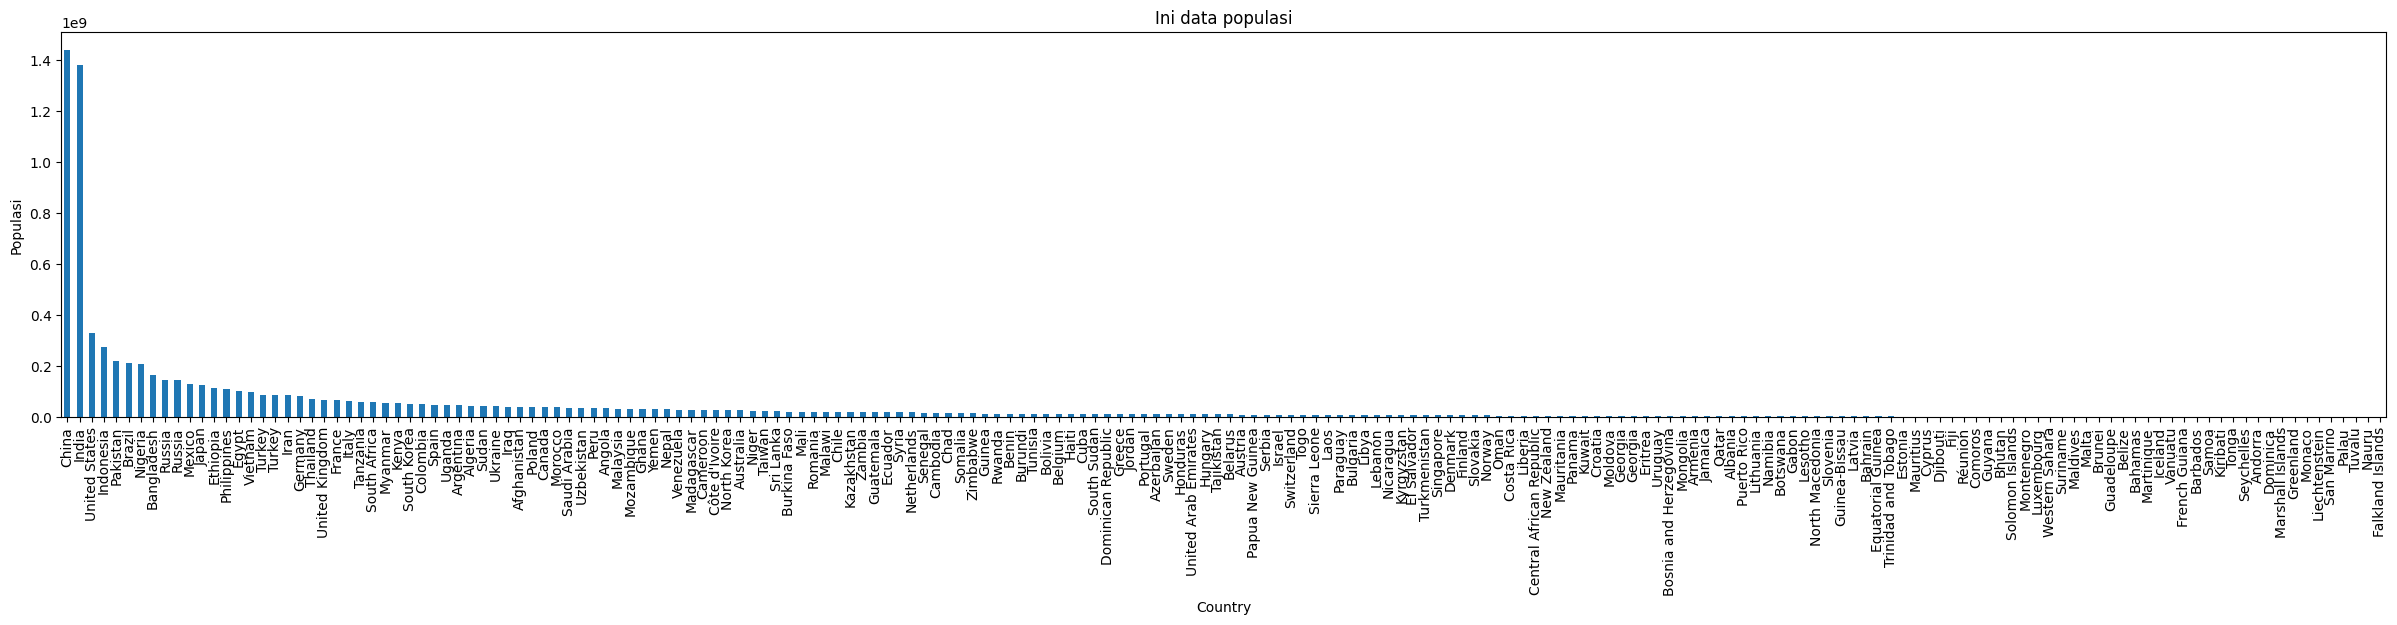

In [ ]:
final_result_df_score_index = pd.read_csv('final_result.csv', index_col=2)
ax = final_result_df_score_index['Population'].plot(kind='bar', figsize=(30,5), title="Ini data populasi")
ax.set_ylabel("Populasi")

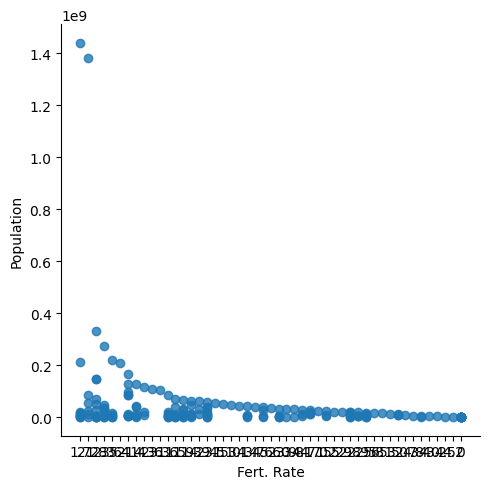

In [ ]:
sns.lmplot(x='Fert. Rate', y='Population', data=merged_df, fit_reg=False)

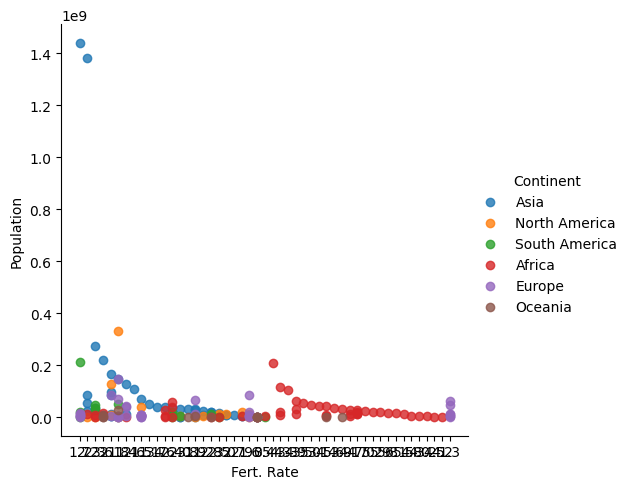

In [ ]:
sns.lmplot(x='Fert. Rate', y='Population', data=merged_df, fit_reg=False, hue='Continent')